August 2023 note: I started this analysis in June of 2020 using the covid data compiled by the NYTimes (metadata here: https://github.com/nytimes/covid-19-data). As of March 2023, the times is no longer updating the dataset - I'll attempt the same analysis with the CDC's data out of curiosity. 

In [2]:
setwd("~/Desktop/Accrual/Projects/Covid/")
require(ggplot2)
covid <- read.csv(url("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"))
require(ggplot2)
require(plotly)
library(shiny)

In [3]:
durham <- covid[which(covid$fips==37063),]

In [4]:
durham$datedate <- as.Date(durham$date)
durham$logcases <- log(durham$cases)
durham$logdeaths <- log(durham$deaths)

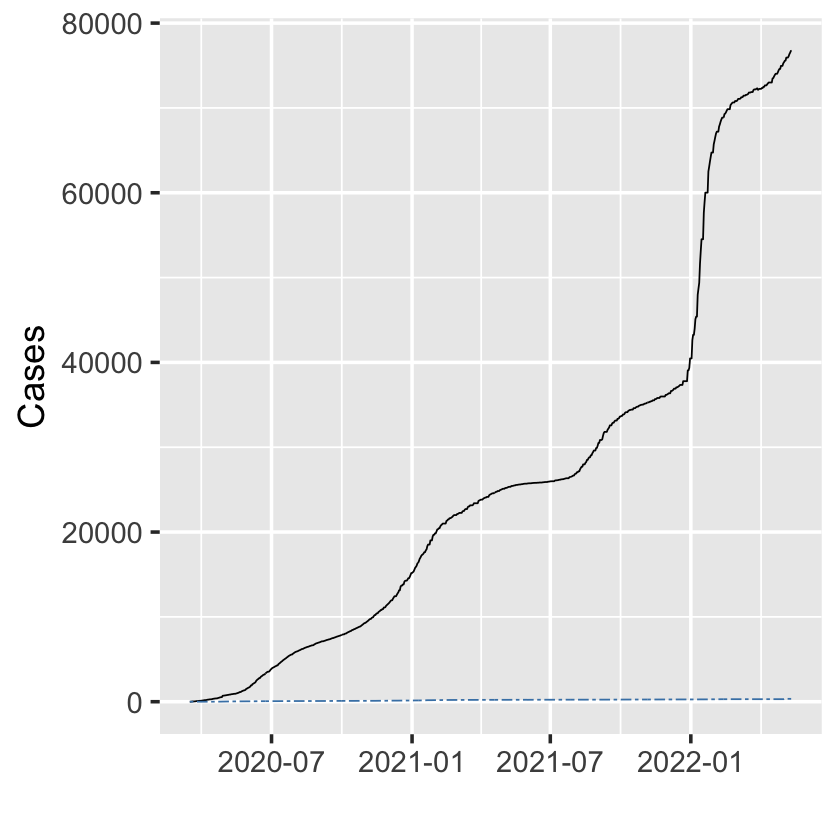

In [5]:
ggplot(durham, aes(x=datedate, y=cases)) +
  geom_line() + 
  xlab("") +
      geom_line(aes(y = deaths), color="steelblue", linetype="twodash") +
        theme_grey(base_size = 22) +
            ylab("Cases")


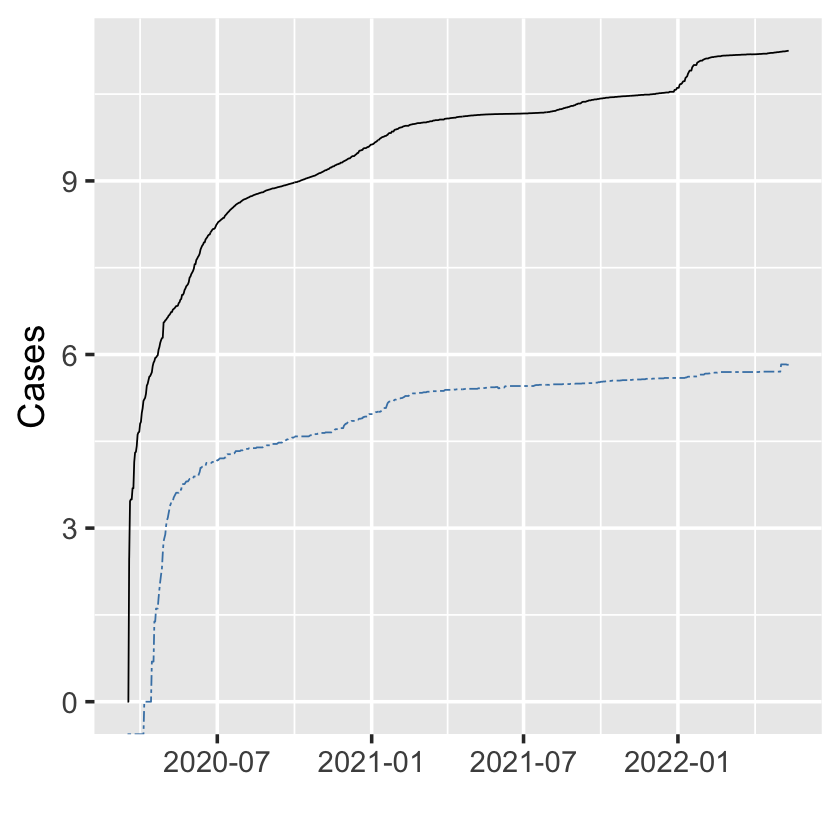

In [6]:
ggplot(durham, aes(x=datedate, y=logcases)) +
  geom_line() + 
  xlab("") +
      geom_line(aes(y = logdeaths), color="steelblue", linetype="twodash") +
        theme_grey(base_size = 22) +
            ylab("Cases")

In [7]:
NC <- covid[which(covid$state=='North Carolina'),]
NC$datedate <- as.Date(NC$date)
NC$logcases <- log(NC$cases)
NC$logdeaths <- log(NC$deaths)

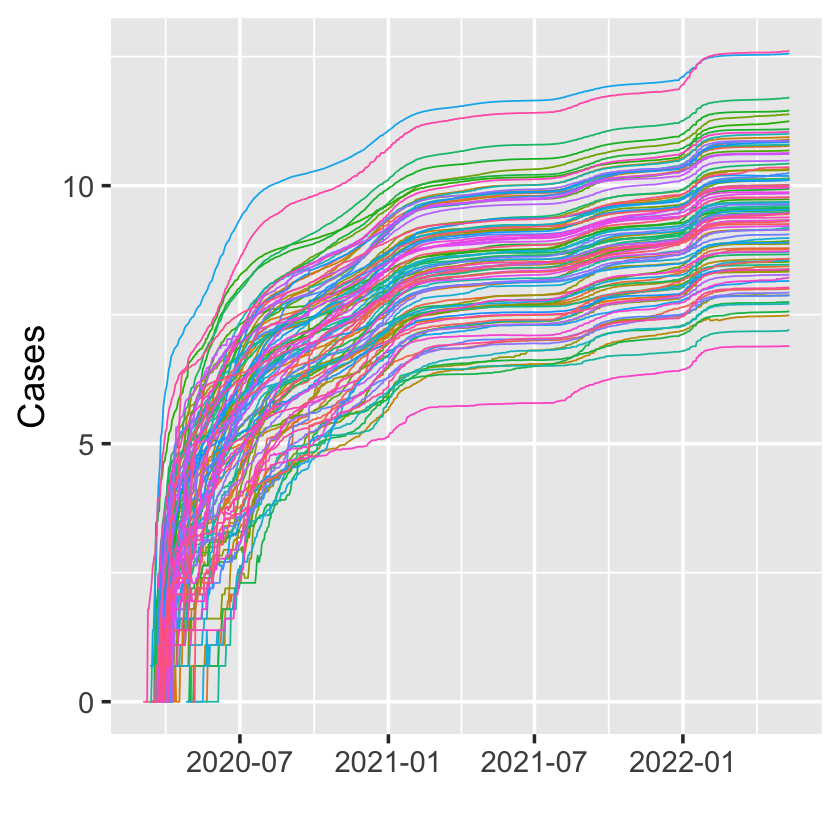

In [8]:
NC_County_log_Plot <- ggplot(NC, aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") + theme(legend.position="none")
NC_County_log_Plot 

In [9]:
ggsave("logplot.pdf",plot=NC_County_log_Plot,width = 20, height = 20, units = "cm")

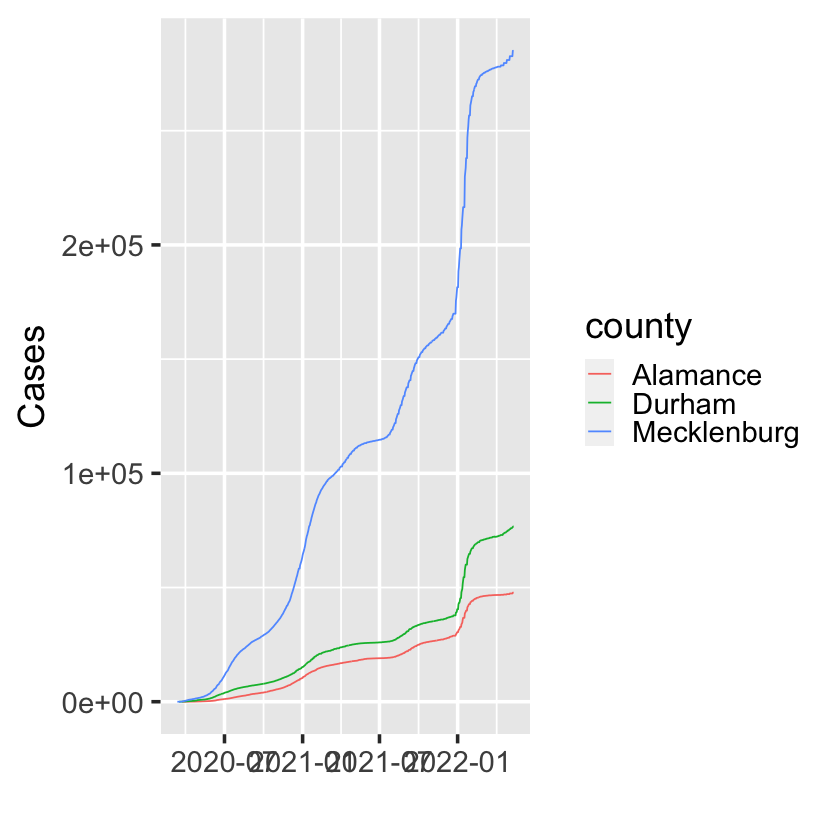

In [10]:
NC_triCounty_Plot <- ggplot(NC[which(NC$county=='Durham'|NC$county=='Mecklenburg'|NC$county=='Alamance'),], aes(x=datedate, y=cases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") 
NC_triCounty_Plot
ggsave(file=paste0(Sys.Date(),"_tricounty.png"),plot=NC_triCounty_Plot,width=8, height=4, dpi=300)

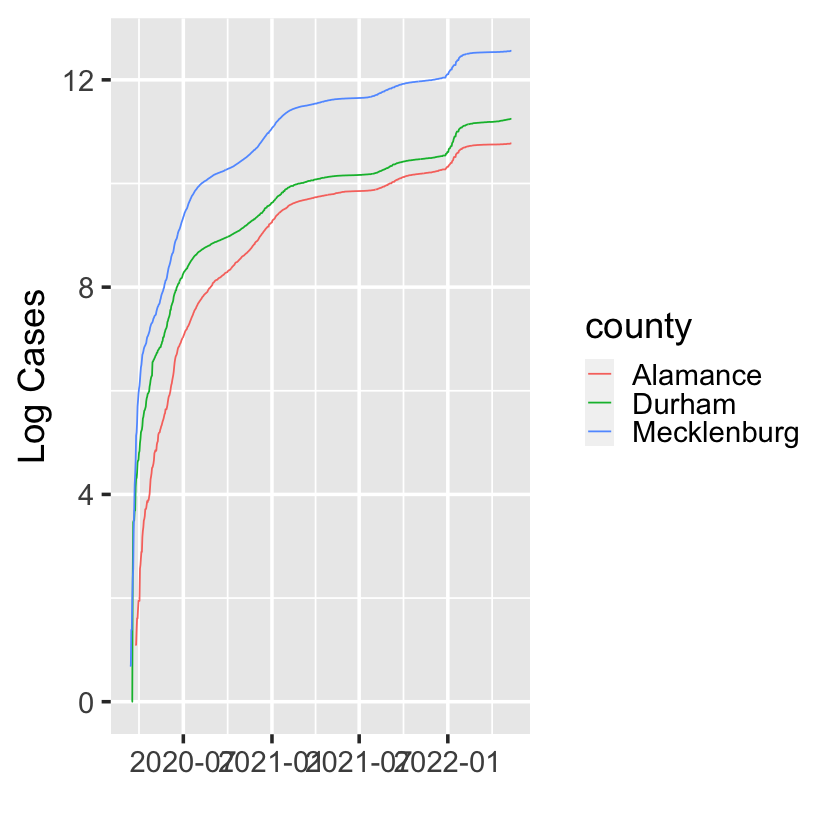

In [11]:
NC_County_Plot_logs <- ggplot(NC[which(NC$county=='Durham'|NC$county=='Mecklenburg'|NC$county=='Alamance'),], aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases")
NC_County_Plot_logs
ggsave(file=paste0(Sys.Date(),"_","tricounty_logs.png"),plot=NC_County_Plot_logs,width=8, height=4, dpi=300)

In [12]:
AL <- covid[which(covid$state=='Alabama'),]
AL$datedate <- as.Date(AL$date)
AL$logcases <- log(AL$cases)
AL$logdeaths <- log(AL$deaths)

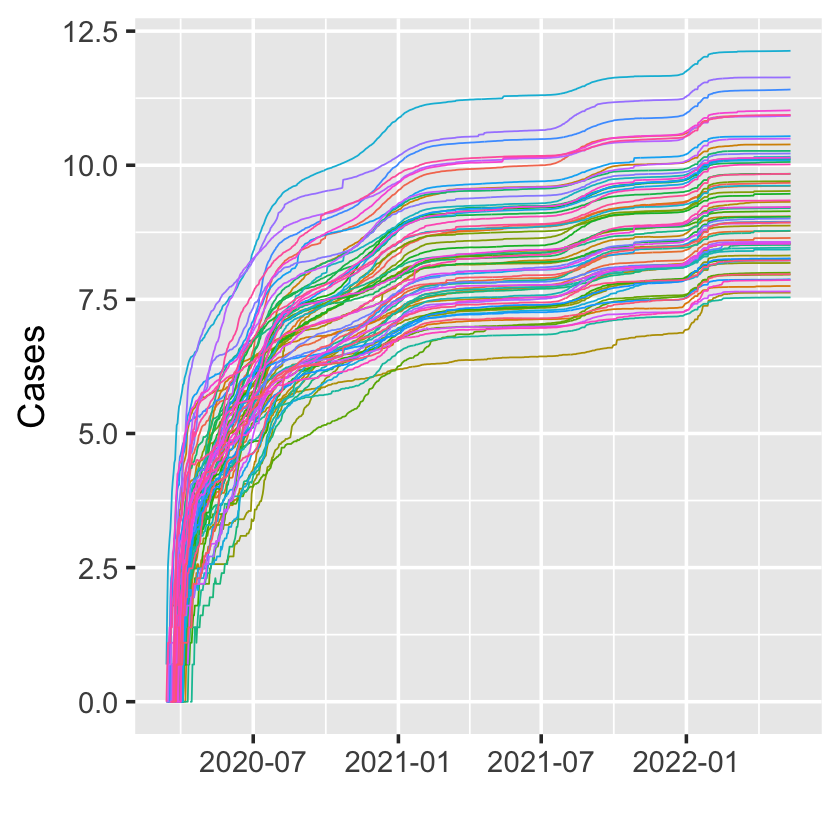

In [13]:
AL_County_log_Plot <- ggplot(AL, aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") + theme(legend.position="none")
AL_County_log_Plot 

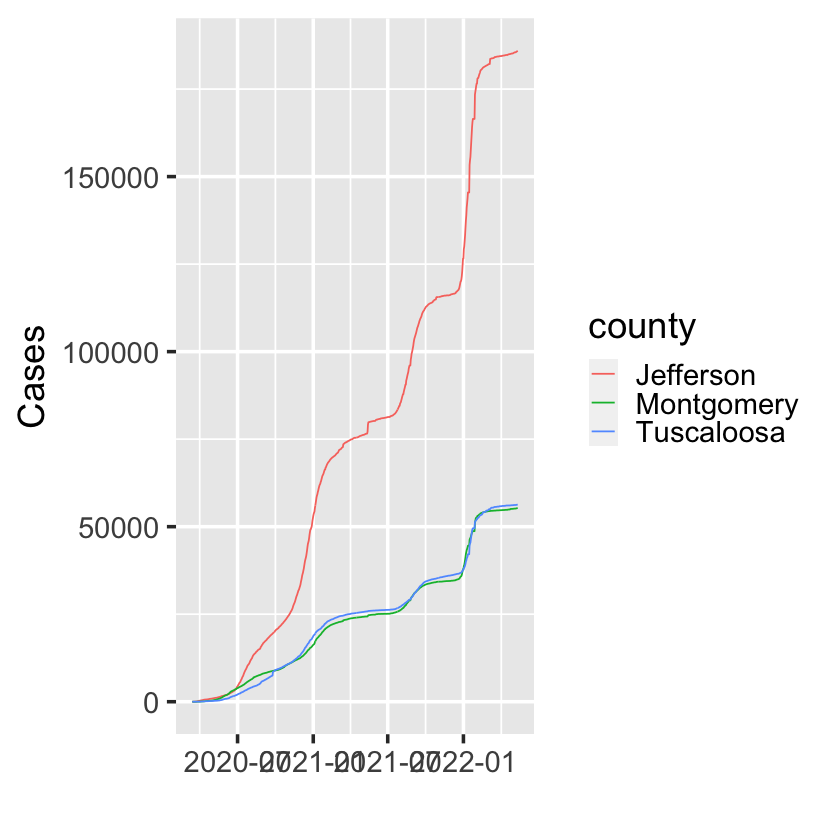

In [14]:
AL_triCounty_Plot <- ggplot(AL[which(AL$county=='Jefferson'|AL$county=='Tuscaloosa'|AL$county=='Montgomery'),], aes(x=datedate, y=cases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") 
AL_triCounty_Plot
ggsave(file=paste0(Sys.Date(),"_","tricounty_AL.png"),plot=AL_triCounty_Plot,width=8, height=4, dpi=300)

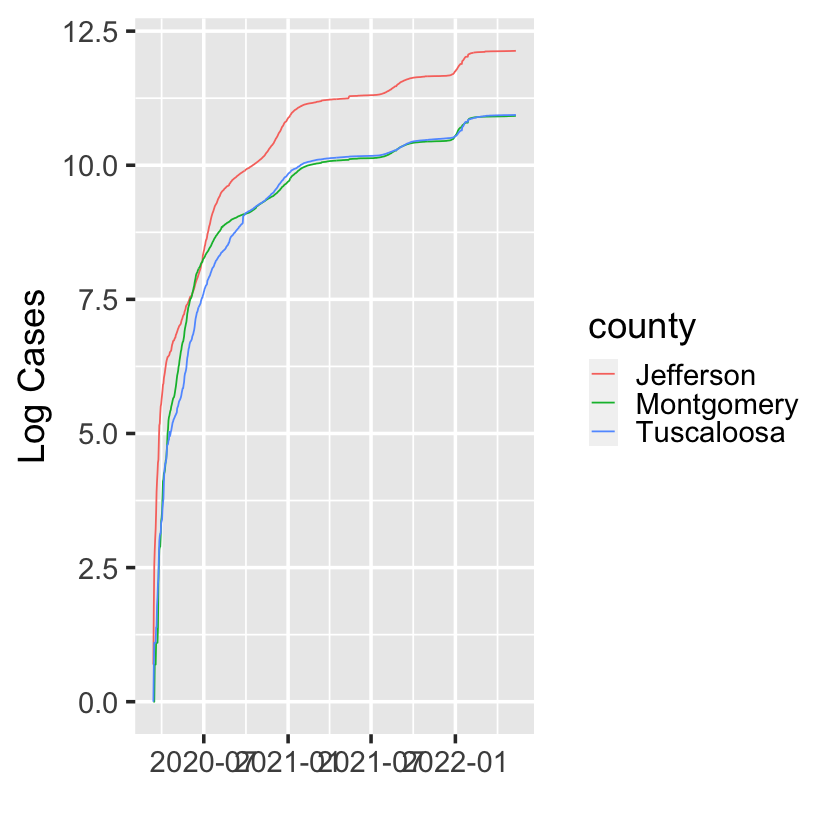

In [15]:
AL_triCounty_Plot_logs <- ggplot(AL[which(AL$county=='Jefferson'|AL$county=='Tuscaloosa'|AL$county=='Montgomery'),], aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") 
AL_triCounty_Plot_logs
ggsave(file=paste0(Sys.Date(),"_","log_tricounty_AL.png"),plot=AL_triCounty_Plot_logs,width=8, height=4, dpi=300)

In [16]:
WA <- covid[which(covid$state=='Washington'),]
WA$datedate <- as.Date(WA$date)
WA$logcases <- log(WA$cases)
WA$logdeaths <- log(WA$deaths)

In [17]:
CA <- covid[which(covid$state=='California'),]
CA$datedate <- as.Date(CA$date)
CA$logcases <- log(CA$cases)
CA$logdeaths <- log(CA$deaths)

In [18]:
GA <- covid[which(covid$state=='Georgia'),]
GA$datedate <- as.Date(GA$date)
GA$logcases <- log(GA$cases)
GA$logdeaths <- log(GA$deaths)

In [19]:
TN <- covid[which(covid$state=='Tennessee'),]
TN$datedate <- as.Date(TN$date)
TN$logcases <- log(TN$cases)
TN$logdeaths <- log(TN$deaths)

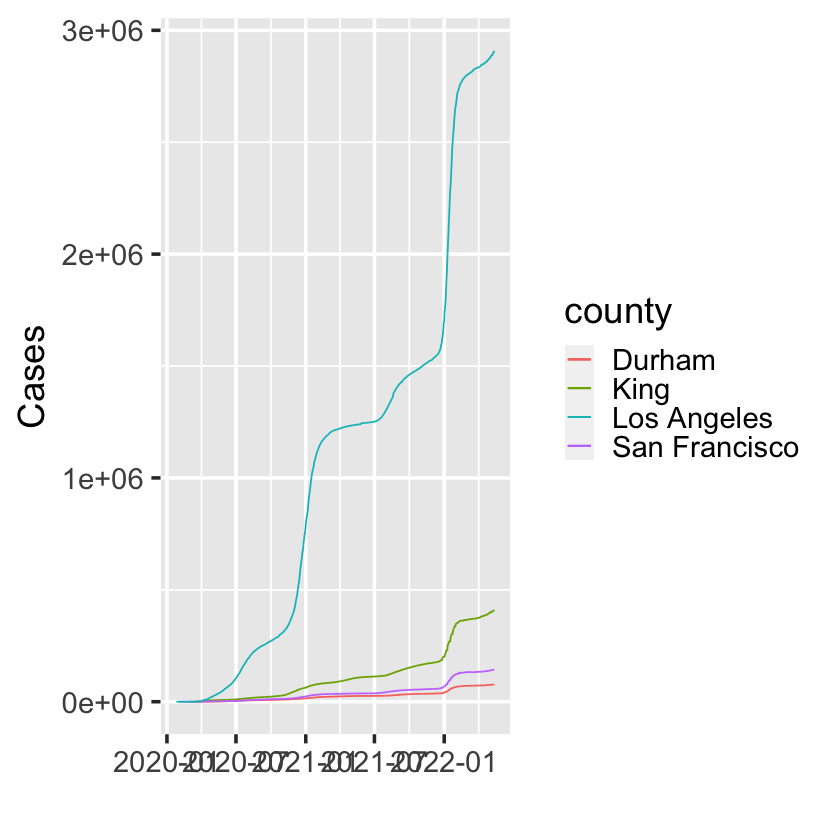

In [20]:
NCWACA <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=cases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=WA[which(WA$county=='King'),],aes(x=datedate,y=cases)) +
                                    geom_line(data=CA[which(CA$county=='San Francisco'),],aes(x=datedate,y=cases)) +
                                        geom_line(data=CA[which(CA$county=='Los Angeles'),],aes(x=datedate,y=cases))
NCWACA
ggsave(file=paste0(Sys.Date(),"_","ncwaca.png"),plot=NCWACA,width=8, height=4, dpi=300)

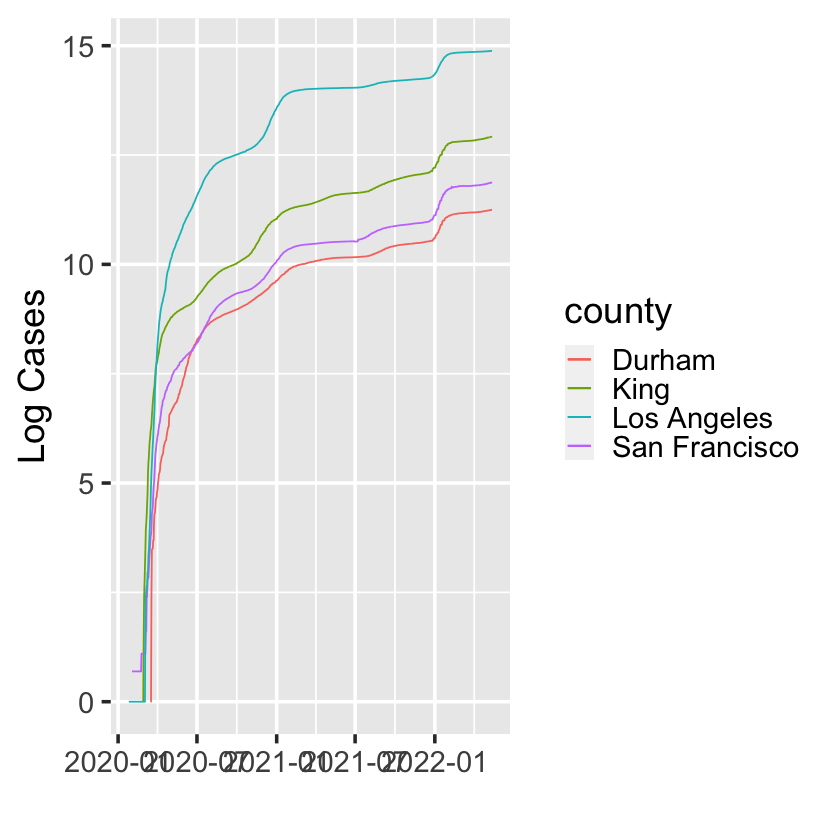

In [21]:
log_NCWACA <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") +
                geom_line(data=WA[which(WA$county=='King'),],aes(x=datedate,y=logcases)) +
                    geom_line(data=CA[which(CA$county=='San Francisco'),],aes(x=datedate,y=logcases)) +
                        geom_line(data=CA[which(CA$county=='Los Angeles'),],aes(x=datedate,y=logcases))



log_NCWACA
ggsave(file=paste0(Sys.Date(),"_","logncwaca.png"),plot=log_NCWACA,width=8, height=4, dpi=300)

In [22]:
NCaggregate <- aggregate(NC$cases, by=list(Date=NC$datedate), FUN=sum)
NCaggregate[,3] <- log(NCaggregate$x)
names(NCaggregate) <- c('NCDate','NCCases','logNCCases')
CAaggregate <- aggregate(CA$cases, by=list(Date=CA$datedate), FUN=sum)
CAaggregate[,3] <- log(CAaggregate$x)
names(CAaggregate) <- c('CADate','CACases','logCACases')
WAaggregate <- aggregate(WA$cases, by=list(Date=WA$datedate), FUN=sum)
WAaggregate[,3] <- log(WAaggregate$x)
names(WAaggregate) <- c('WADate','WACases','logWACases')
ALaggregate <- aggregate(AL$cases, by=list(Date=AL$datedate), FUN=sum)
ALaggregate[,3] <- log(ALaggregate$x)
names(ALaggregate) <- c('ALDate','ALCases','logALCases')
GAaggregate <- aggregate(GA$cases, by=list(Date=GA$datedate), FUN=sum)
GAaggregate[,3] <- log(GAaggregate$x)
names(GAaggregate) <- c('GADate','GACases','logGACases')
TNaggregate <- aggregate(TN$cases, by=list(Date=TN$datedate), FUN=sum)
TNaggregate[,3] <- log(TNaggregate$x)
names(TNaggregate) <- c('TNDate','TNCases','logTNCases')

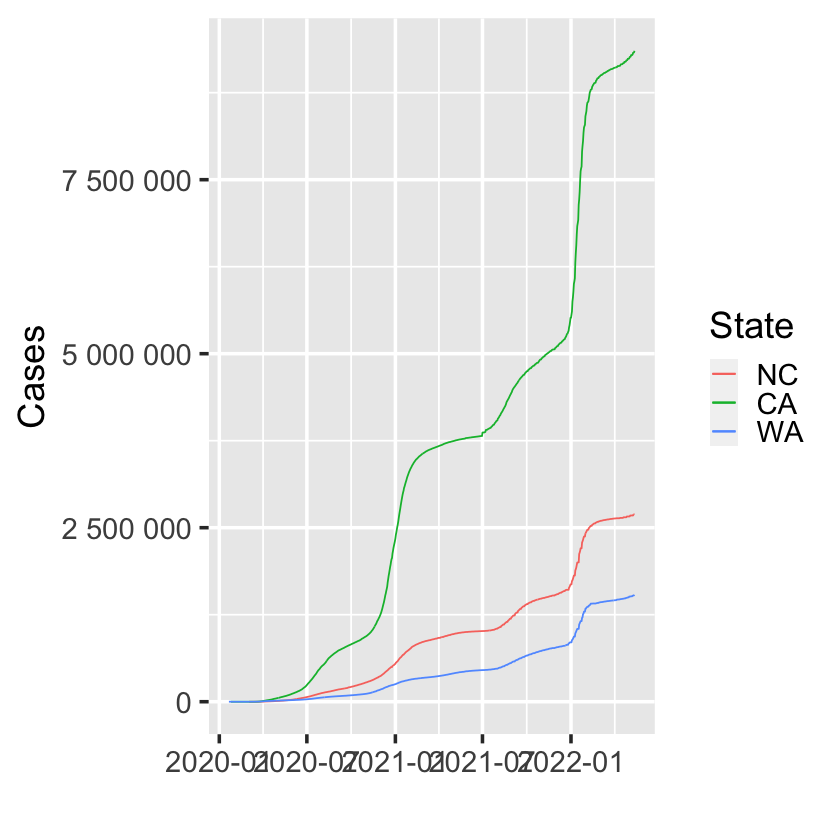

In [23]:
NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases,color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                scale_y_continuous(labels = scales::number)
NCWACA_sum
ggsave(file="ncwaca_sum.png",plot=NCWACA_sum,width=8, height=4, dpi=300)

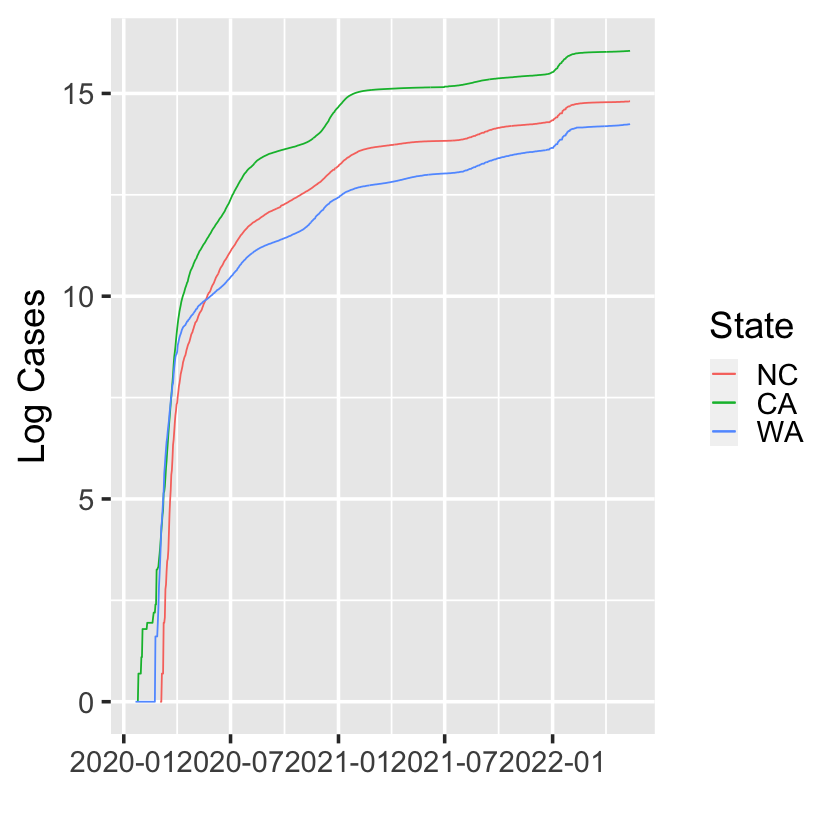

In [24]:
log_NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=logNCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=logCACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=logWACases,color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                scale_y_continuous(labels = scales::number)
log_NCWACA_sum
ggsave(file=paste0(Sys.Date(),"_","log_ncwaca_sum.png"),plot=log_NCWACA_sum,width=8, height=4, dpi=300)

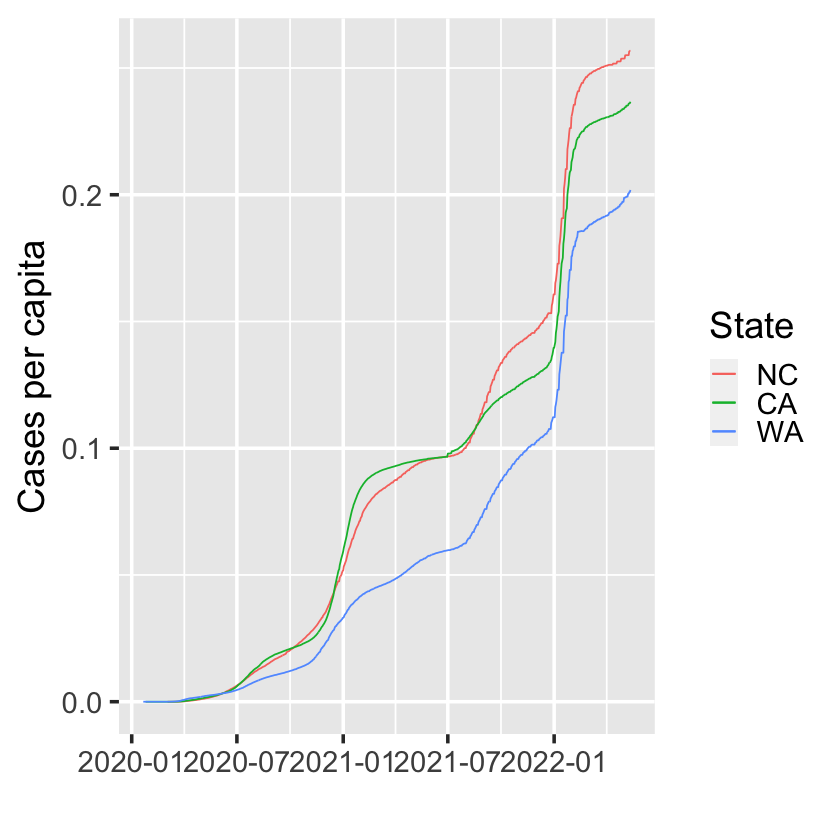

In [25]:
capita_NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases/10490000,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases per capita") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases/39510000,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases/7600000,color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                scale_y_continuous(labels = scales::number)
capita_NCWACA_sum
ggsave(file=paste0(Sys.Date(),"_","capita_ncwaca_sum.png"),plot=capita_NCWACA_sum,width=8, height=4, dpi=300)

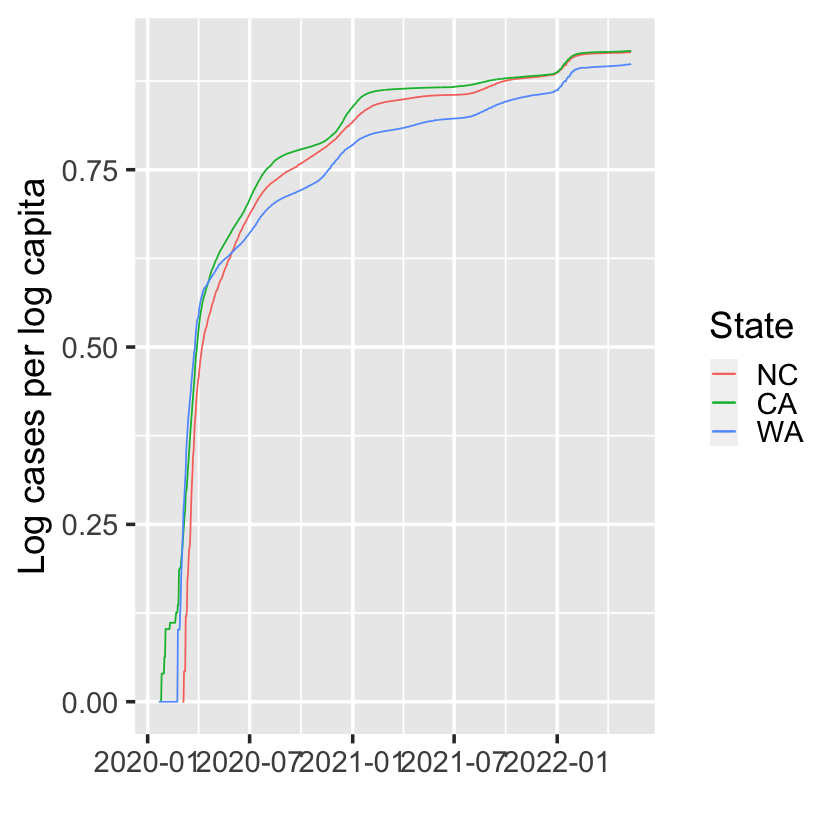

In [26]:
log_capita_NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=logNCCases/log(10490000),color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log cases per log capita") +
                geom_line(data=CAaggregate,aes(x=CADate,y=logCACases/log(39510000),color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=logWACases/log(7600000),color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                scale_y_continuous(labels = scales::number)
log_capita_NCWACA_sum
ggsave(file=paste0(Sys.Date(),"_","log_capita_ncwaca_sum.png"),plot=log_capita_NCWACA_sum,width=8, height=4, dpi=300)

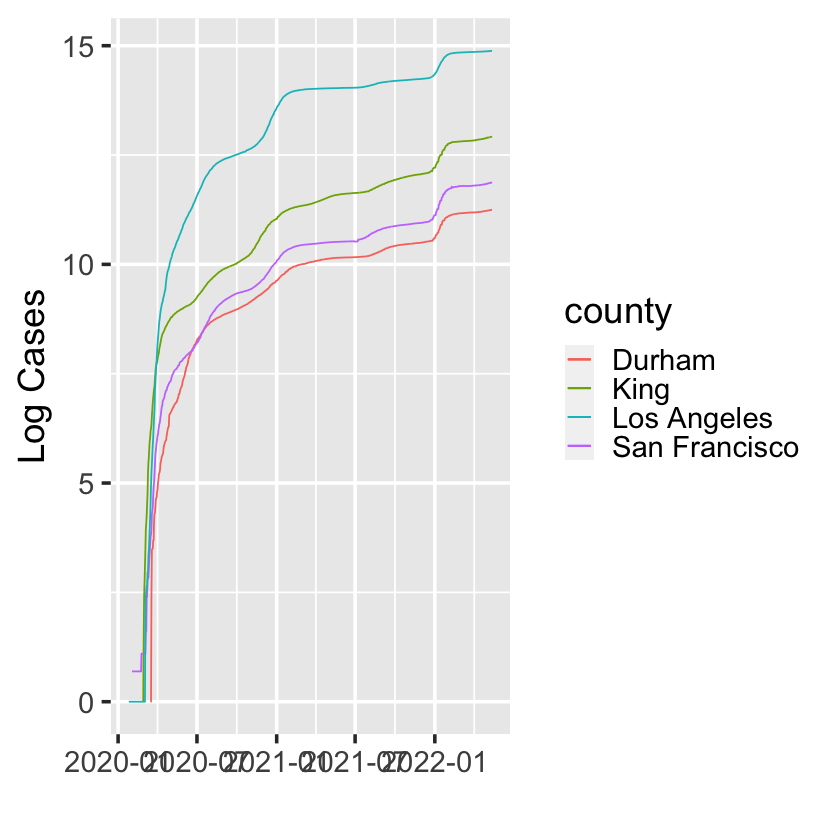

In [27]:
log_NCWACACACA <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") +
                geom_line(data=WA[which(WA$county=='King'),],aes(x=datedate,y=logcases)) +
                    geom_line(data=CA[which(CA$county=='San Francisco'),],aes(x=datedate,y=logcases)) +
                        geom_line(data=CA[which(CA$county=='Los Angeles'),],aes(x=datedate,y=logcases))



log_NCWACACACA
ggsave(file=paste0(Sys.Date(),"_","logncwacacaca.png"),plot=log_NCWACACACA,width=8, height=4, dpi=300)

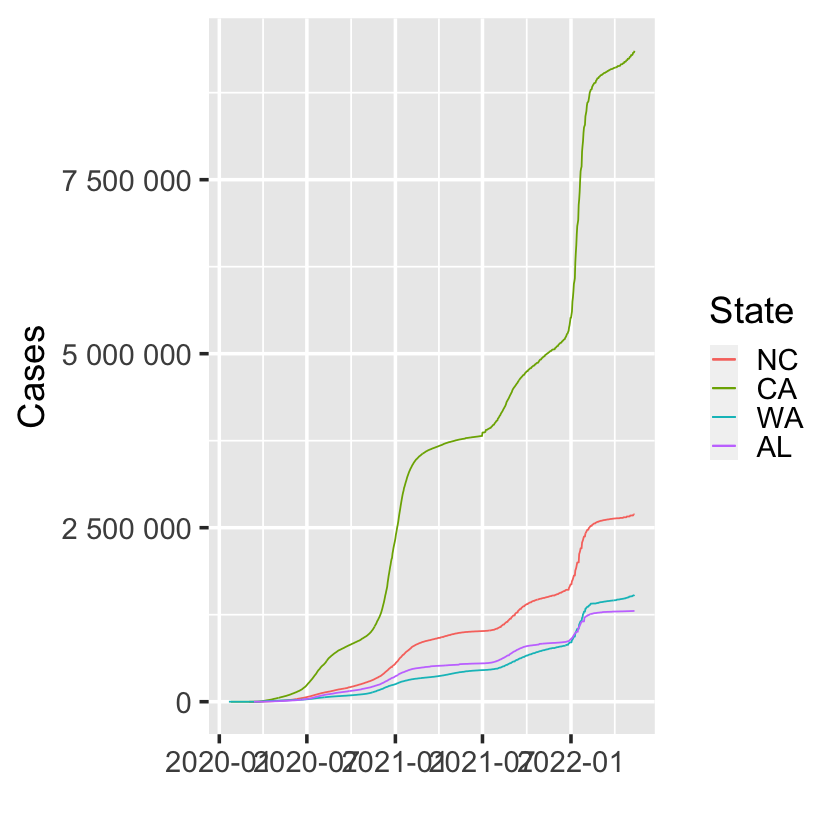

In [28]:
NCWACAAL_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases,color="purple")) +
                         geom_line(data=ALaggregate,aes(x=ALDate,y=ALCases,color="yellow")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA","AL"))+
                                scale_y_continuous(labels = scales::number)
NCWACAAL_sum
ggsave(file=paste0(Sys.Date(),"_","ncwacaal_sum.png"),plot=NCWACA_sum,width=8, height=4, dpi=300)

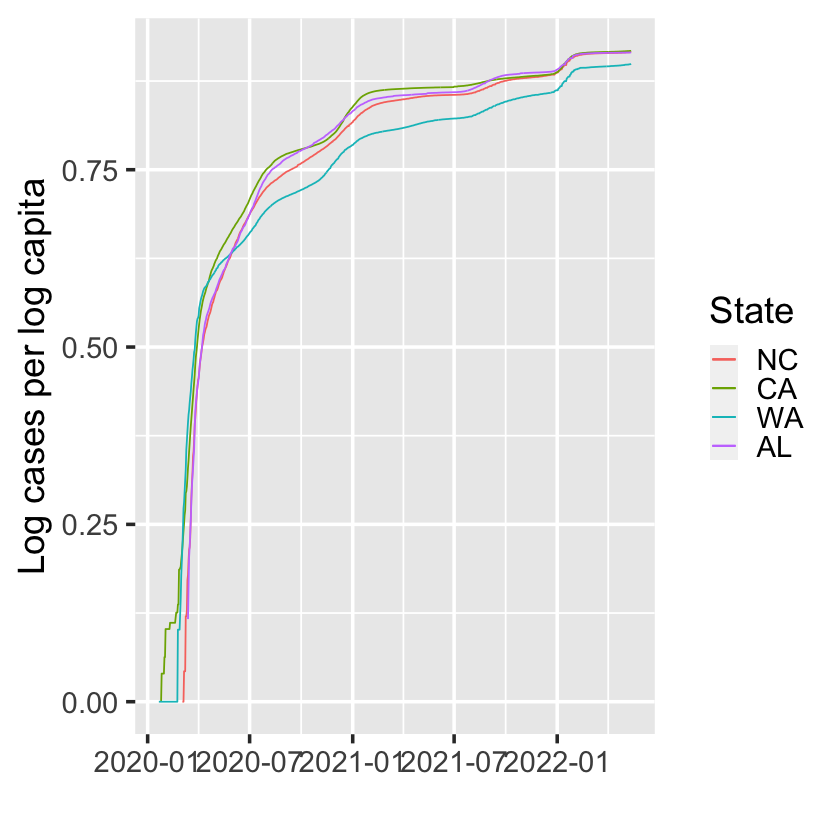

In [29]:
log_capita_NCWACAAL_sum <- ggplot(NCaggregate, aes(x=NCDate, y=logNCCases/log(10490000),color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log cases per log capita") +
                geom_line(data=CAaggregate,aes(x=CADate,y=logCACases/log(39510000),color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=logWACases/log(7600000),color="purple")) +
                         geom_line(data=ALaggregate,aes(x=ALDate,y=logALCases/log(4802740),color="yellow")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA","AL"))+
                                scale_y_continuous(labels = scales::number)
log_capita_NCWACAAL_sum
ggsave(file=paste0(Sys.Date(),"_","log_capita_ncwacaal_sum.png"),plot=log_capita_NCWACA_sum,width=8, height=4, dpi=300)

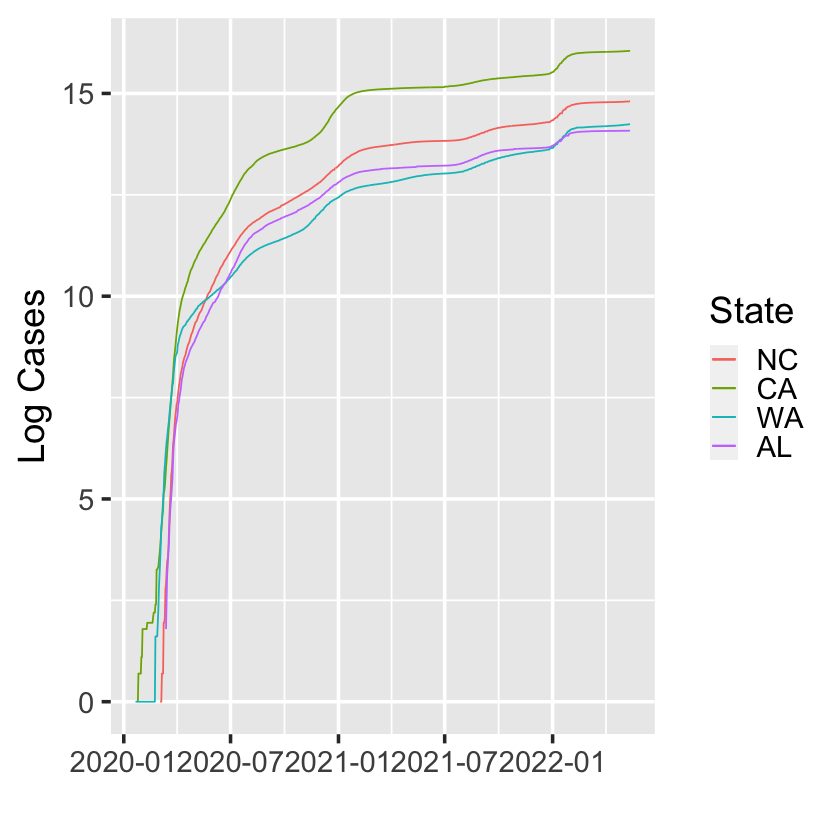

In [30]:
log_NCWACAAL_sum <- ggplot(NCaggregate, aes(x=NCDate, y=logNCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=logCACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=logWACases,color="purple")) +
                         geom_line(data=ALaggregate,aes(x=ALDate,y=logALCases,color="yellow")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA","AL"))+
                                scale_y_continuous(labels = scales::number)
log_NCWACAAL_sum
ggsave(file=paste0(Sys.Date(),"_","log_ncwacaal_sum.png"),plot=log_NCWACA_sum,width=8, height=4, dpi=300)

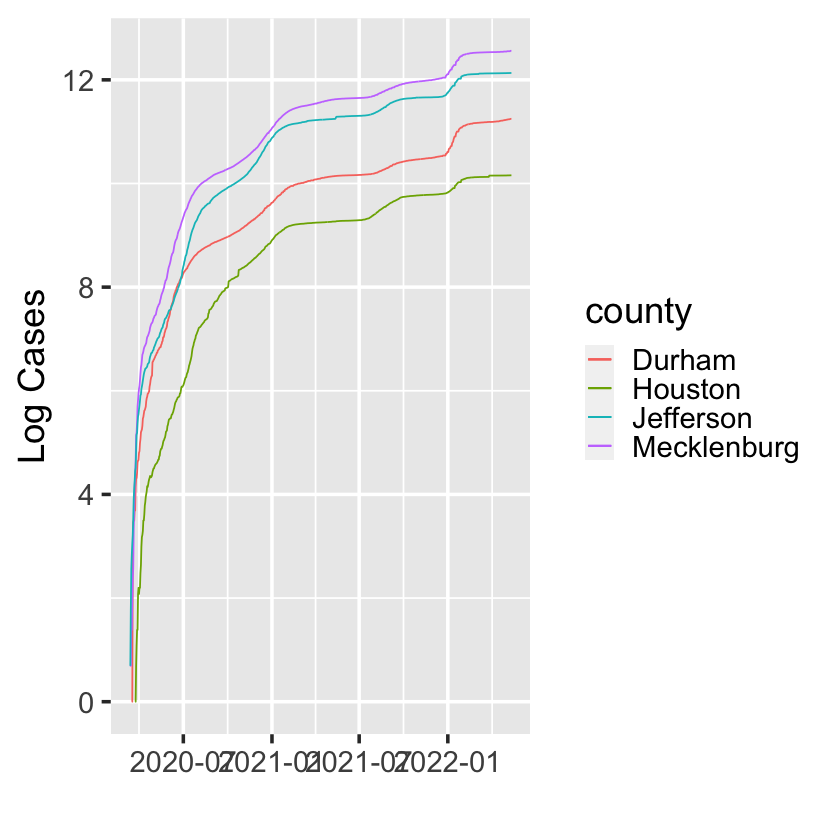

In [31]:
log_multsistate <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=logcases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log Cases") +
                geom_line(data=AL[which(AL$county=='Houston'),],aes(x=datedate,y=logcases)) +
                    geom_line(data=NC[which(NC$county=='Mecklenburg'),],aes(x=datedate,y=logcases)) +
                        geom_line(data=AL[which(AL$county=='Jefferson'),],aes(x=datedate,y=logcases))



log_multsistate
ggsave(file=paste0(Sys.Date(),"_","log_multsistate.png"),plot=log_multsistate,width=12, height=4, dpi=300)

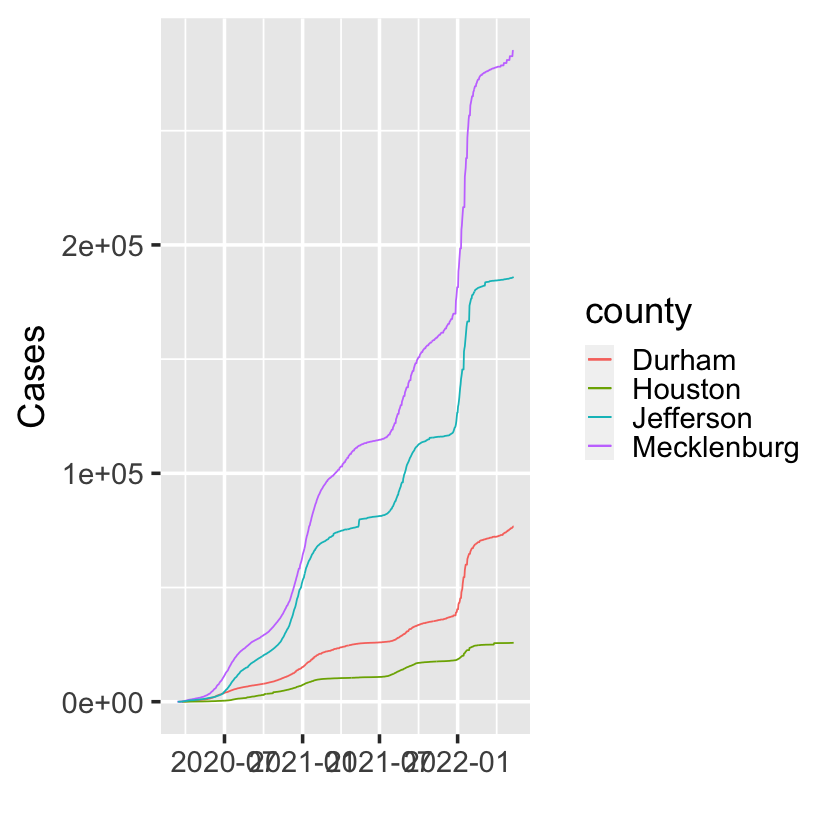

In [32]:
multsistate <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=cases, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=AL[which(AL$county=='Houston'),],aes(x=datedate,y=cases)) +
                    geom_line(data=NC[which(NC$county=='Mecklenburg'),],aes(x=datedate,y=cases)) +
                        geom_line(data=AL[which(AL$county=='Jefferson'),],aes(x=datedate,y=cases))



multsistate
ggsave(file=paste0(Sys.Date(),"_","multsistate.png"),plot=multsistate,width=12, height=4, dpi=300)

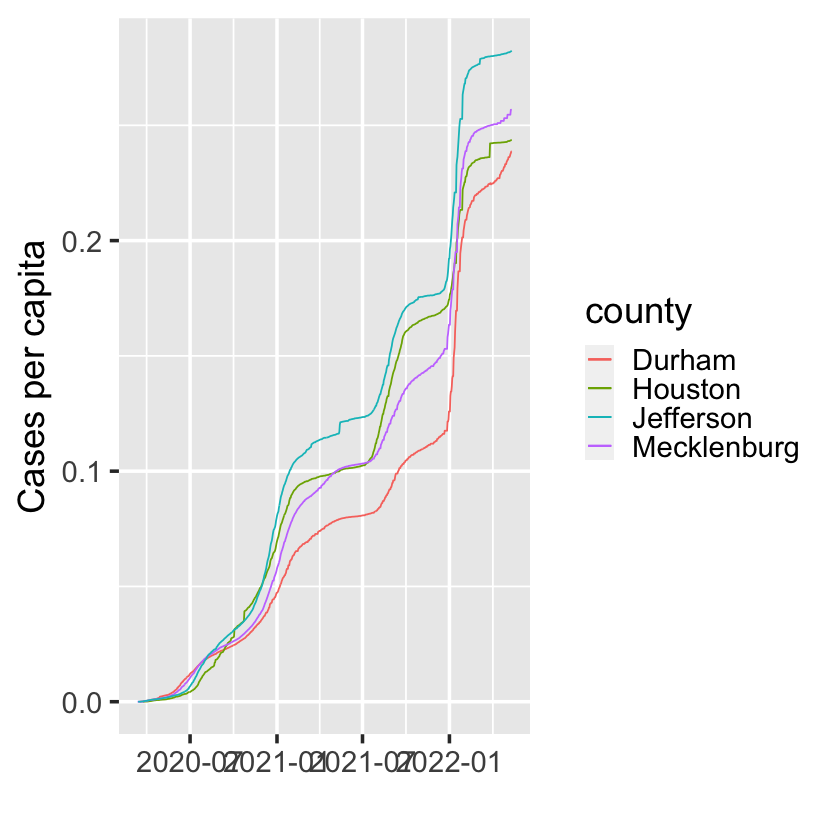

In [33]:
multsistate_percap <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=cases/321488, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases per capita") +
                geom_line(data=AL[which(AL$county=='Houston'),],aes(x=datedate,y=cases/105882)) +
                    geom_line(data=NC[which(NC$county=='Mecklenburg'),],aes(x=datedate,y=cases/1110000)) +
                        geom_line(data=AL[which(AL$county=='Jefferson'),],aes(x=datedate,y=cases/658573))



multsistate_percap
ggsave(file=paste0(Sys.Date(),"_","multsistate_percap.png"),plot=multsistate_percap,width=12, height=4, dpi=300)

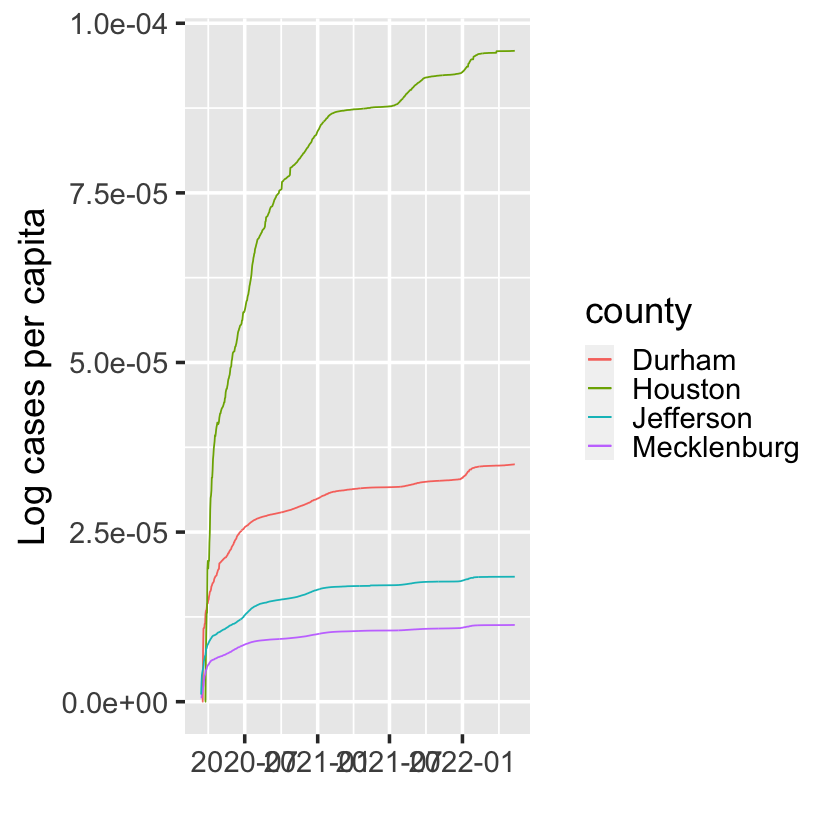

In [34]:
logmultsistate_percap <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=logcases/321488, group=county, color=county)) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Log cases per capita") +
                geom_line(data=AL[which(AL$county=='Houston'),],aes(x=datedate,y=logcases/105882)) +
                    geom_line(data=NC[which(NC$county=='Mecklenburg'),],aes(x=datedate,y=logcases/1110000)) +
                        geom_line(data=AL[which(AL$county=='Jefferson'),],aes(x=datedate,y=logcases/658573))



logmultsistate_percap
ggsave(file=paste0(Sys.Date(),"_","log_multsistate_percap.png"),plot=logmultsistate_percap,width=12, height=4, dpi=300)

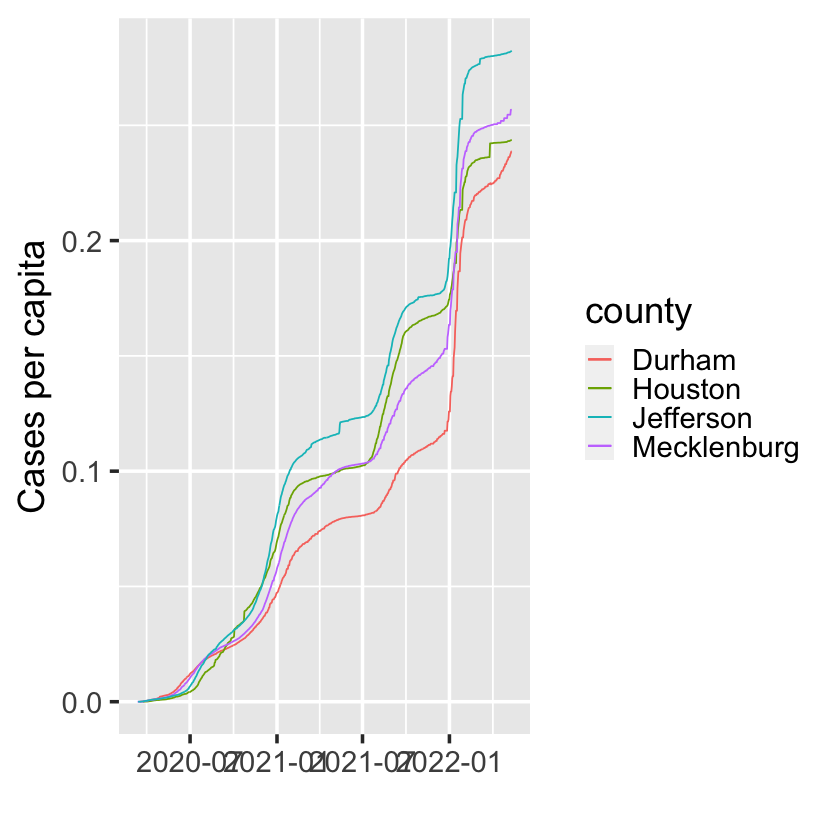

In [35]:
logscale_multsistate_percap <- ggplot(NC[which(NC$county=='Durham'),], aes(x=datedate, y=cases/321488, group=county, color=county), log="y") +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases per capita") +
                geom_line(data=AL[which(AL$county=='Houston'),],aes(x=datedate,y=cases/105882)) +
                    geom_line(data=NC[which(NC$county=='Mecklenburg'),],aes(x=datedate,y=cases/1110000)) +
                        geom_line(data=AL[which(AL$county=='Jefferson'),],aes(x=datedate,y=cases/658573))



logscale_multsistate_percap
ggsave(file=paste0(Sys.Date(),"_","multsistate_percap.png"),plot=logscale_multsistate_percap,width=12, height=4, dpi=300)

Loading required package: scales

Warning message:
“Removed 593 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 628 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 622 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 593 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 628 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 622 rows containing missing values (`geom_line()`).”


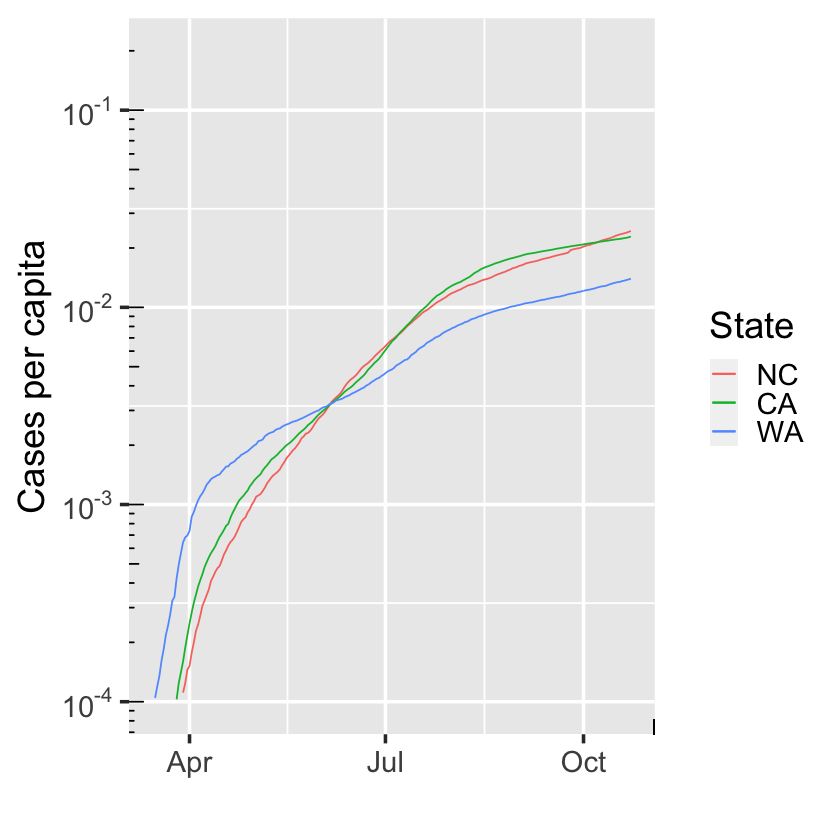

In [36]:
require(scales)
logscale_capita_NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases/10490000,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases per capita") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases/39510000,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases/7600000,color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                     scale_y_log10(limits=c(0.0001,0.2),labels = scales::trans_format("log10", scales::math_format(10^.x)), breaks = scales::trans_breaks("log10", function(x) 10^x)) +
                                            annotation_logticks()  +
                                                scale_x_date(limits = as.Date(c('2020-03-15','2020-10-23')))
    
logscale_capita_NCWACA_sum
ggsave(file=paste0(Sys.Date(),"_","logscale_capita_NCWACA_sum.png"),plot=logscale_capita_NCWACA_sum,width=8, height=4, dpi=300)

Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 603 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 607 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 603 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 607 rows containing missing values (`geom_line()`).”


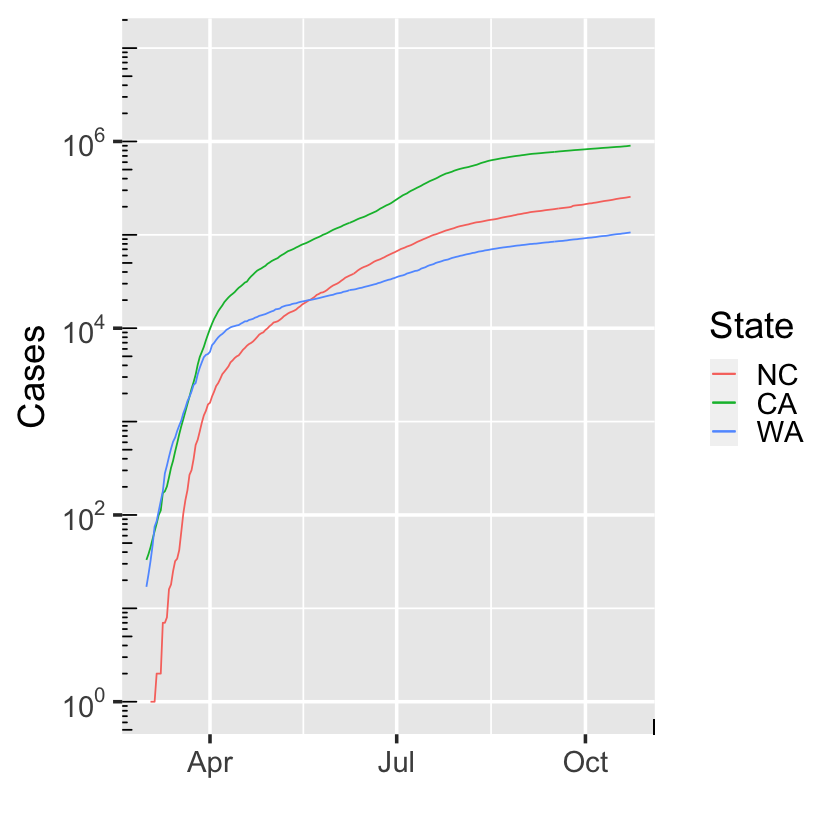

In [37]:
require(scales)
logscale_NCWACA_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases,color="purple")) +
                            scale_color_discrete(name = "State", labels = c("NC", "CA","WA"))+
                                     scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)), breaks = scales::trans_breaks("log10", function(x) 10^x)) +
                                            annotation_logticks()  +
                                                scale_x_date(limits = as.Date(c('2020-03-01','2020-10-23')))
    
logscale_NCWACA_sum
ggsave(file=paste0(Sys.Date(),"_","logscale_NCWACA_sum.png"),plot=logscale_NCWACA_sum,width=8, height=4, dpi=300)

Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 603 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 607 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 603 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 607 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 567 rows containing missing values (`geom_line()`).”


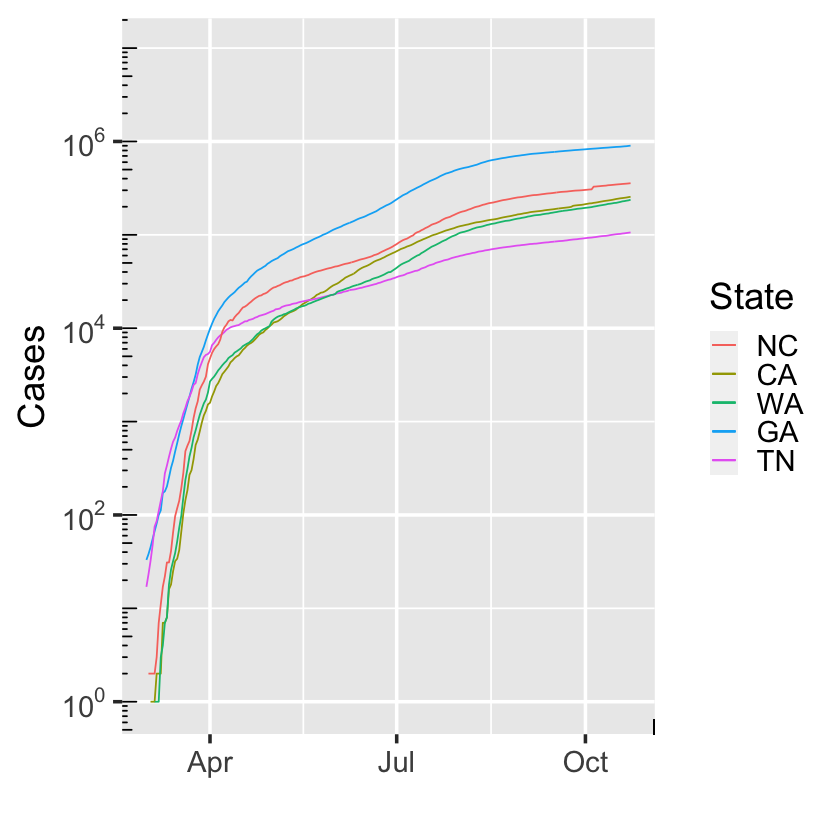

In [38]:
require(scales)
logscale_NCWACAGATN_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases,color="purple")) +
                     geom_line(data=GAaggregate,aes(x=GADate,y=GACases,color="blue")) +
                     geom_line(data=TNaggregate,aes(x=TNDate,y=TNCases,color="gray")) +
                            scale_color_discrete(name = "State", labels = c("NC","CA","WA","GA","TN"))+
                                     scale_y_log10(labels = scales::trans_format("log10", scales::math_format(10^.x)), breaks = scales::trans_breaks("log10", function(x) 10^x)) +
                                            annotation_logticks()  +
                                                scale_x_date(limits = as.Date(c('2020-03-01','2020-10-23')))
    
logscale_NCWACAGATN_sum
ggsave(file=paste0(Sys.Date(),"_","logscale_NCWACAGATN_sum.png"),plot=logscale_NCWACAGATN_sum,width=8, height=4, dpi=300)

Warning message:
“Removed 593 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 628 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 622 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 589 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 587 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 593 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 628 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 622 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 589 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 587 rows containing missing values (`geom_line()`).”


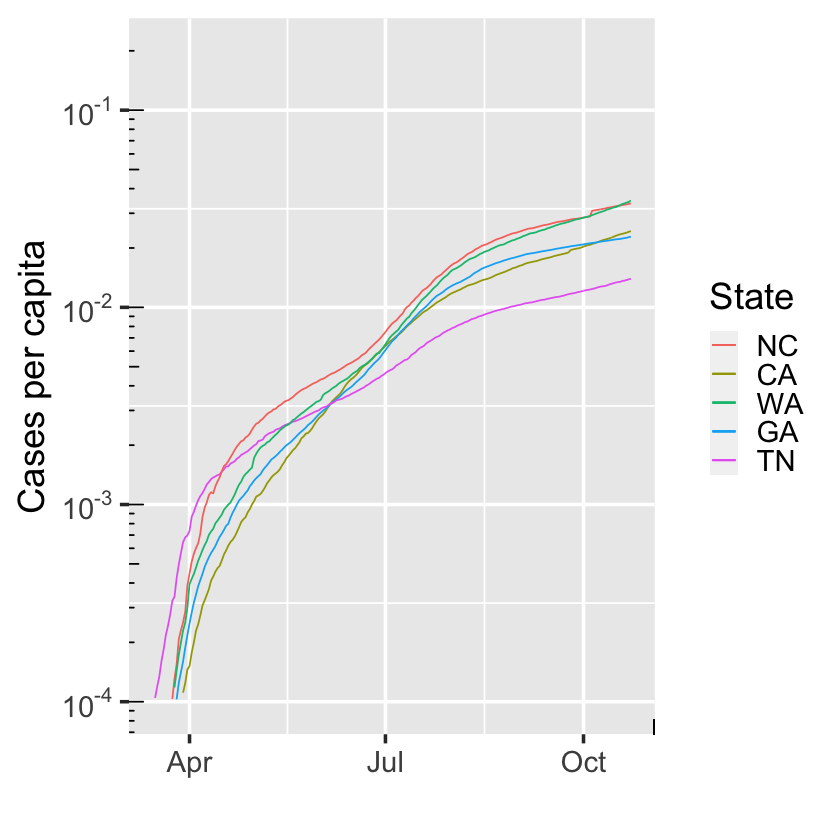

In [39]:
require(scales)
logscale_capita_NCWACAGATN_sum <- ggplot(NCaggregate, aes(x=NCDate, y=NCCases/10490000,color="darkred")) +
  geom_line() + 
  xlab("") +
        theme_grey(base_size = 22) +
            ylab("Cases per capita") +
                geom_line(data=CAaggregate,aes(x=CADate,y=CACases/39510000,color="green")) +
                     geom_line(data=WAaggregate,aes(x=WADate,y=WACases/7600000,color="purple")) +
                     geom_line(data=GAaggregate,aes(x=GADate,y=GACases/10617423,color="blue")) +
                     geom_line(data=TNaggregate,aes(x=TNDate,y=TNCases/6829174,color="gray")) +
                            scale_color_discrete(name = "State", labels = c("NC","CA","WA","GA","TN"))+
                                     scale_y_log10(limits=c(0.0001,0.2),labels = scales::trans_format("log10", scales::math_format(10^.x)), breaks = scales::trans_breaks("log10", function(x) 10^x)) +
                                            annotation_logticks()  +
                                                scale_x_date(limits = as.Date(c('2020-03-15','2020-10-23')))
    
logscale_capita_NCWACAGATN_sum
ggsave(file=paste0(Sys.Date(),"_","logscale_capita_NCWACAGATN_sum.png"),plot=logscale_capita_NCWACAGATN_sum,width=8, height=4, dpi=300)

In [40]:
plot_usmap(include = c("CA", "ID", "NV", "OR", "WA")) +
  labs(title = "Western US States",
       subtitle = "These are the states in the Pacific Timezone.")

ERROR: Error in plot_usmap(include = c("CA", "ID", "NV", "OR", "WA")): could not find function "plot_usmap"
